## **Loading Data**

In [30]:
from google.colab import files
import io
import pandas as pd
 
""" 
Upload a CSV file from local device
and convert into a dataframe
"""
def upload():
  uploaded = files.upload()
  filename = next(iter(uploaded))
  df = pd.read_csv(io.BytesIO(uploaded[filename]),lineterminator='\n')
  return df

### Before Layoff Data

In [46]:
tweets_df = upload()
tweets_df.head()

Saving Before_Layoff.csv to Before_Layoff (2).csv


,User,Date Created,Tweet
0,marisainpink,2022-01-01 23:59:56+00:00,I was unprepared for the shocking information ...
1,OfficialNWCA1,2022-01-01 23:59:45+00:00,What a piece posted by Wes today on Facebook! ...
2,_MattRoy,2022-01-01 23:59:38+00:00,Currently following a 156-comment long Faceboo...
3,NBCCH20,2022-01-01 23:59:36+00:00,FOLLOW US ON SOCIAL MEDIA:\nTwitter - https://...
4,hxneyfarmer,2022-01-01 23:59:15+00:00,it’s 2022 and bitches from the midwest who wen...


### Layoff Data

In [47]:
layoffs_df = upload()
layoffs_df.head()

Saving After_Layoff.csv to After_Layoff (2).csv


,User,Date Created,Tweet\r
0,thecolumbian,2023-03-31 23:11:02+00:00,SEATTLE —Dozens of food service employees work...
1,KellogSully,2023-03-31 19:25:01+00:00,@EndGameWW3 @johnbruso I don’t want to tell yo...
2,ZeroNorth11,2023-03-31 19:00:02+00:00,Tech industry takes another hit as Amazon and ...
3,lovexniss,2023-03-31 17:27:23+00:00,@_Vickaaaye I’ve had Facebook recruiters in my...
4,HEIR_less,2023-03-31 16:13:34+00:00,Man Facebook did a major layoff yesterday. Now...


### After Layoff Data

In [48]:
after_tweets_df = upload()
after_tweets_df.head()

Saving After_Layoff_General - Copy - Copy.csv to After_Layoff_General - Copy - Copy.csv


,User,Date Created,Tweet\r
0,NIRMALK98689924,2022-11-01 23:59:54+00:00,Youtube|Facebook|LIVE https://t.co/H0n2AQ5WPL\r
1,selormfx,2022-11-01 23:59:51+00:00,All it takes is 6 months to learn a skill that...
2,sokchhai,2022-11-01 23:59:49+00:00,Please help to follow my page Facebook and You...
3,FantasciWorld,2022-11-01 23:59:46+00:00,#imf #goldmansachs #wef #cbdc want unelected o...
4,treeckobot,2022-11-01 23:59:37+00:00,Visit our facebook page format\r


## **Loading Trained ML Model**

In [6]:
import pickle
 
uploaded = files.upload()
filename = next(iter(uploaded))
model = pickle.load(open(filename, 'rb'))

Saving final_trained_model.sav to final_trained_model.sav


## **Data Preprocessing**

### Importing Libraries

In [7]:
## Data Manipulation 
import pandas as pd
import numpy as np
import re

## Text Preprocessing
!pip install contractions
import contractions

import nltk
nltk.download('stopwords') #for stopwords
nltk.download('wordnet') #for WordNetLemmatizer
nltk.download('punkt') #for word_tokenize

from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Visualization 
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 19.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Deleting unwanted columns

In [8]:
def del_col(df):
  print(df.columns)
  return df.drop(['User', 'Date Created'], axis=1)

In [49]:
tweets_df = del_col(tweets_df)
layoffs_df = del_col(layoffs_df)

Index(['User', 'Date Created', 'Tweet'], dtype='object')
Index(['User', 'Date Created', 'Tweet\r'], dtype='object')


In [50]:
layoffs_df = layoffs_df.rename(columns={'Tweet\r': 'Tweet'})

In [51]:
after_tweets_df = del_col(after_tweets_df)

Index(['User', 'Date Created', 'Tweet\r'], dtype='object')


In [52]:
after_tweets_df = after_tweets_df.rename(columns={'Tweet\r': 'Tweet'})

### Data cleaning

1.   Lower casing
2.   Removal of Urls
3.   Removal of @tags and #
4.   Removal of punctuations
5.   Removal of emojis and symbols
6.   Removal of stop words
7.   Lemmatization






In [11]:
def data_cleaning(tweet):
  # covert all text to lowercase
  tweet = tweet.lower()

  # remove all urls
  tweet = re.sub('http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

  # remove @ user tags and #
  tweet = re.sub('\@\w+|\#', '', tweet)

  # remove emojis
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
  regrex_pattern.sub('',tweet)

  # remove numbers
  tweet = ''.join(c for c in tweet if not c.isdigit())

  # resolving contractions
  expanded = []
  for word in tweet.split():
    expanded.append(contractions.fix(word))
  tweet =  ' '.join(expanded)

  # remove punctuations
  tweet = re.sub('[^\w\s]', '', tweet)

  # remove stop words
  tweet_tokens = word_tokenize(tweet)
  filtered_texts = [word for word in tweet_tokens if word not in stop_words]

  # lemmatizing
  lemma = WordNetLemmatizer()
  lemma_texts = (lemma.lemmatize(text, pos='a') for text in filtered_texts)

  return " ".join(lemma_texts)



In [53]:
tweets_df.Tweet = tweets_df['Tweet'].apply(data_cleaning)
layoffs_df.Tweet = layoffs_df['Tweet'].apply(data_cleaning)

In [54]:
after_tweets_df.Tweet = after_tweets_df['Tweet'].apply(data_cleaning)

### Checking for duplicate rows and deleting them

In [16]:
def drop_dupli(df):
  duplicate = df[df.duplicated()]
  return df.drop_duplicates('Tweet')

In [55]:
tweets_df = drop_dupli(tweets_df)
layoffs_df = drop_dupli(layoffs_df)
print(tweets_df.shape,layoffs_df.shape)

(12515, 1) (7700, 1)


In [56]:
after_tweets_df = drop_dupli(after_tweets_df)
print(after_tweets_df.shape)

(10945, 1)


## **Predicting sentiments**

In [19]:
def pred_senti (df,proc_df):
  vect = TfidfVectorizer(sublinear_tf=True).fit(proc_df['Tweet'].values.astype('U'))
  tweets = vect.transform(df['Tweet'])
  sentiment = model.predict(tweets)
  return sentiment

### Loading x_train that was used for vectorising

In [22]:
vect_df = upload()
vect_df.head()

Saving vect.csv to vect.csv


,Tweet
0,world needs dependent facebook
1,mark zuckerberg suspends president trumps face...
2,ny attorney general lead antitrust investigati...
3,tried lurking sisters facebook see dads curren...
4,whole leesville get one facebook post cut uppp


In [57]:
tweets_df['Sentiment'] = pred_senti(tweets_df, vect_df)
layoffs_df['Sentiment'] = pred_senti(layoffs_df, vect_df)

In [58]:
after_tweets_df['Sentiment'] = pred_senti(after_tweets_df, vect_df)

## **Calculating Corporate Reputation**



In [25]:
def Calculate_NBR(df):
  pos = df[df.Sentiment == 'Positive']
  pos_count = len(pos.index)
  neg = df[df.Sentiment == 'Negative']
  neg_count = len(neg.index)
  NBR = ((pos_count-neg_count)/(pos_count+neg_count))*100
  return NBR

In [59]:
NBR_before_layoff = Calculate_NBR(tweets_df)
NBR_only_layoff = Calculate_NBR(layoffs_df)
NBR_after_layoff = Calculate_NBR(after_tweets_df)
print(NBR_before_layoff,NBR_after_layoff,NBR_only_layoff)

35.10331872260488 29.991179064980887 24.599051276259317


## **Data Visualization**

### Bar graph of NBR scores

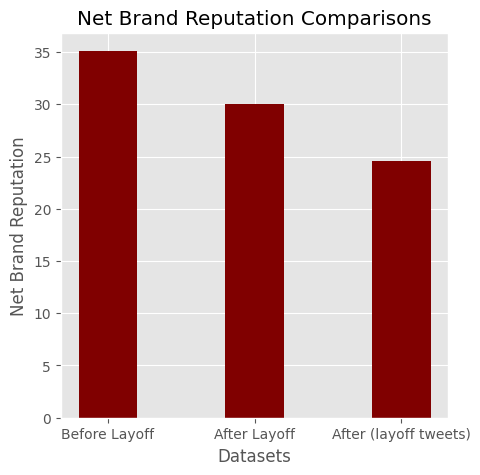

In [60]:
Dataset = ['Before Layoff', 'After Layoff', 'After (layoff tweets)']
values = [NBR_before_layoff,NBR_after_layoff,NBR_only_layoff]
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Dataset, values, color ='maroon', width = 0.4)
 
plt.xlabel("Datasets")
plt.ylabel("Net Brand Reputation")
plt.title("Net Brand Reputation Comparisons")
plt.show()

### Count graphs of various datasets

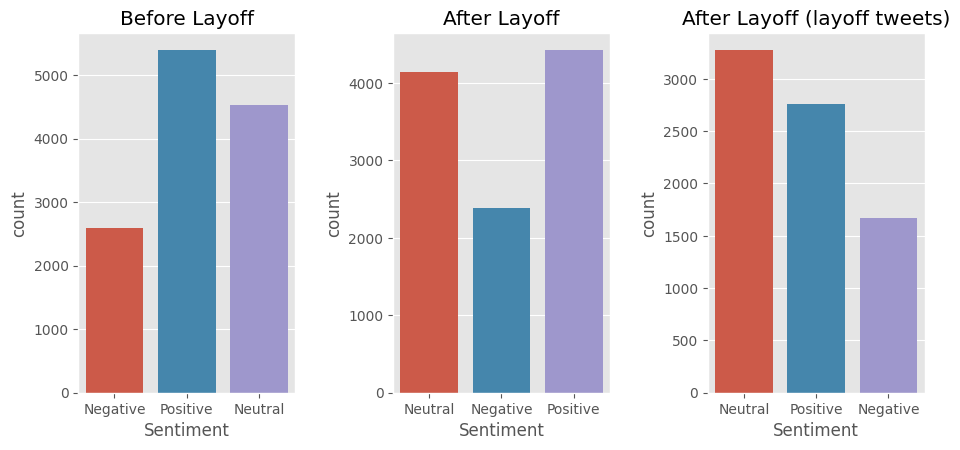

In [61]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
fig.tight_layout(pad=4.0)
ax[0].title.set_text('Before Layoff')
ax[1].title.set_text('After Layoff')
ax[2].title.set_text('After Layoff (layoff tweets)')
sns.countplot(x = 'Sentiment', data = tweets_df, ax=ax[0])
sns.countplot(x = 'Sentiment', data = after_tweets_df, ax=ax[1])
sns.countplot(x = 'Sentiment', data = layoffs_df, ax=ax[2])
fig.show()

### Pie chart of various datasets

<Axes: title={'center': 'After Layoff (layoff tweet)'}>

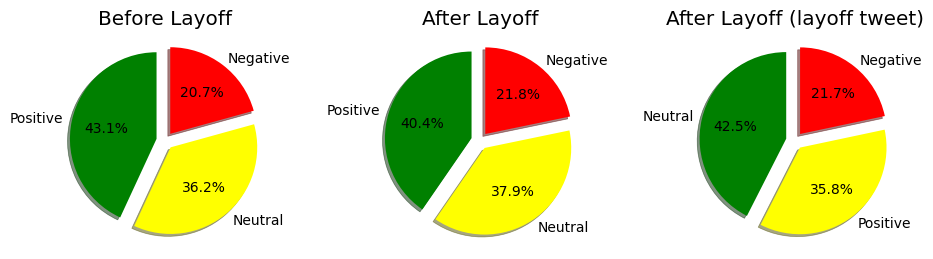

In [62]:
fig, ax = plt.subplots(1,3, figsize=(10,10))
fig.tight_layout(pad=4.0)
colors = ("green","yellow","red")
tags = tweets_df['Sentiment'].value_counts()
tags1 = after_tweets_df['Sentiment'].value_counts()
tags2 = layoffs_df['Sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
          startangle=90, explode = explode, label='', ax=ax[0], 
          title='Before Layoff')
tags1.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
          startangle=90, explode = explode, label='', ax=ax[1],
           title='After Layoff')
tags2.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
          startangle=90, explode = explode, label='', ax=ax[2],
           title='After Layoff (layoff tweet)')